    Lets check how data should be splitted to training/test parts
    to obtain optimal results

In [1]:
#Let start with importing libraries
import io
import pandas as pd
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import random
import numpy as np
import time

I will be working on Car Evaluation Data Set obtained from: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation


In [2]:
uploaded = files.upload()

Saving car.data to car.data


Oryginal Attribute Values:

    buying       v-high, high, med, low
    maint        v-high, high, med, low
    doors        2, 3, 4, 5-more
    persons      2, 4, more
    lug_boot     small, med, big
    safety       low, med, high
    class_values unacc, acc, good, vgood

Modyfied values to work on numbers
	
    buying       4, 3, 2, 1
    maint        4, 3, 2, 1
    doors        2, 3, 4, 5
    persons      2, 4, 5
    lug_boot     1, 2, 3
    safety       1, 2, 3
    class_values 0, 1, 2, 3  

In [3]:
#Lets import that data
car_data = pd.read_csv(io.BytesIO(uploaded['car.data']))

In [4]:
car_data

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,3


In [5]:
# Here I split data to: inputs--X and results--Y
X, Y = car_data.drop(columns=['class_values']), car_data['class_values']

    To train model i have to split data to training and learning parts
    Here i will check how spliting parameter influences:
    Accuracy of prediction, Standard deviation of prediction and time needed to fit model and predict result


In [6]:
def make_model_and_predict(X, Y, size):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size) #spliting Data to test/train
    # Decision Tree Classifier works well with small Datasets and is designed to
    # predict the value of a target by learning decision inferred from the data
    model = DecisionTreeClassifier() 

    model.fit(X_train, Y_train ) # fitting model to preapared data

    return Y_test, model.predict(X_test) # Calculating what model fitted to test dataset

In [7]:
Accuracy=[]
Times=[]
Standard_deviation=[]
N=10000 # To have a good statistics I take mean values from N calculations

for size in np.linspace(0.01,0.99,60): # Checking range from 1%-99%

  value=0
  time_temp=0
  errors=[]

  for _ in range(N): 
    # Bigger N gives better values, but also consumes much more time to mmake calculations
    start = time.time() # measure the time needed to split data and fit model
    
    Y_test, predictions = make_model_and_predict(X, Y, size)

    end = time.time()# end of time measure
    
    #Save data
    time_temp+=(end - start)
    value += accuracy_score(Y_test, predictions )
    errors.append( np.sqrt(mean_squared_error(Y_test,predictions)) )

  Standard_deviation.append(np.std(errors)/N)
  Times.append(time_temp/N)
  Accuracy.append(value/N)

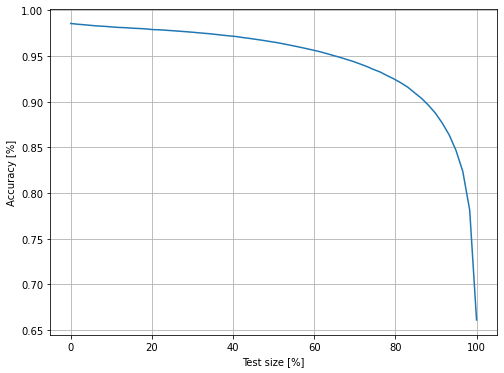

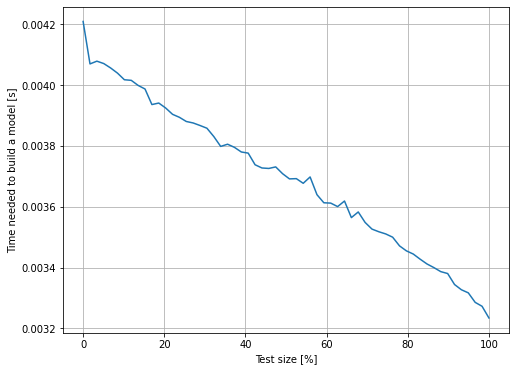

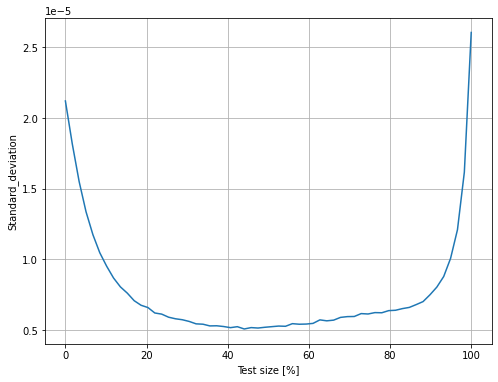

In [8]:
#Lets plot the results

x= np.linspace(0,100,60)

plt.figure(figsize=(8, 6)) 
plt.plot(x,Accuracy)
plt.xlabel("Test size [%]")
plt.ylabel("Accuracy [%]")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6)) 
plt.plot(x,Times)
plt.xlabel("Test size [%]")
plt.ylabel("Time needed to build a model [s]")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6)) 
plt.plot(x,Standard_deviation)
plt.xlabel("Test size [%]")
plt.ylabel("Standard_deviation")
plt.grid()
plt.show()

- As we can see above, I obtained good Accuracy (over 95%) when the training set was bigger than 40%.
- Time increasys lineary with incrising training size.
- Standard deviation of predictions is the lowest when the training dataset is between 20%-80%.

So the most optimal value to split the data is below 80% to training, but not less than 40%.